In [1]:
%load_ext autoreload
%autoreload 2
from etr.auto_import import *
from etr.data.data_loader import load_data

## Data

In [2]:
trade = pd.concat([
    load_data(["2025-05-01", "2025-05-19"], table="MarketTrade", venue="*", symbol="ETHJPY"),
    load_data(["2025-05-01", "2025-05-19"], table="MarketTrade", venue="*", symbol="ETHUSD"),
])
trade["term_amount"] = trade.amount * trade.price / 1e6
trade["latency"] = (trade["timestamp"] - trade.market_created_timestamp).dt.total_seconds() * 1e3

2025-05-19 13:30:12.876|INFO    |etr.data.data_loader: data_loader.load_data 85|Found 67 HDB files, process loading...
100%|██████████| 67/67 [00:00<00:00, 124.34it/s]
2025-05-19 13:30:13.599|INFO    |etr.data.data_loader: data_loader.load_data 85|Found 17 HDB files, process loading...
100%|██████████| 17/17 [00:00<00:00, 89.73it/s]


In [5]:
rate = pd.concat([
    load_data(["2025-05-01", "2025-05-19"], table="Rate", venue="*", symbol="USDJPY"),
    load_data(["2025-05-01", "2025-05-19"], table="Rate", venue="*", symbol="ETHJPY"),
    load_data(["2025-05-01", "2025-05-19"], table="Rate", venue="*", symbol="ETHUSD"),
])

2025-05-19 13:31:29.633|INFO    |etr.data.data_loader: data_loader.load_data 85|Found 14 HDB files, process loading...
100%|██████████| 14/14 [00:01<00:00, 12.84it/s]
2025-05-19 13:31:31.144|INFO    |etr.data.data_loader: data_loader.load_data 85|Found 67 HDB files, process loading...
100%|██████████| 67/67 [00:02<00:00, 24.10it/s]
2025-05-19 13:31:35.96 |INFO    |etr.data.data_loader: data_loader.load_data 85|Found 17 HDB files, process loading...
100%|██████████| 17/17 [00:07<00:00,  2.20it/s]


In [6]:
rate.head(3)

,timestamp,market_created_timestamp,sym,venue,category,best_bid,best_ask,mid_price,misc,universal_id
0,2025-05-01 00:00:00.024862+00:00,2025-05-01 00:00:00.015000+00:00,USDJPY,gmo,websocket,142.978,143.066,143.022,OPEN,c1442b47e96640b5b7db36b1766d8ced
1,2025-05-01 00:00:00.325752+00:00,2025-05-01 00:00:00.317000+00:00,USDJPY,gmo,websocket,142.976,143.064,143.020,OPEN,bcf973f009da4426b55240942ecea07c
2,2025-05-01 00:00:00.627216+00:00,2025-05-01 00:00:00.618000+00:00,USDJPY,gmo,websocket,142.978,143.066,143.022,OPEN,54407e33cd77421a95d9f5aa7fb730ff


In [4]:
trade.head(3)

,timestamp,market_created_timestamp,sym,venue,category,side,price,amount,trade_id,order_ids,misc,universal_id,term_amount,latency
0,2025-05-01 00:00:03.132214+00:00,2025-05-01 00:00:03.061000+00:00,ETHJPY,bitflyer,json-rpc,-1,256917.0,0.01,2595104561,JRF20250430-235952-011444_JRF20250501-000003-7...,None,9d2afcd639a044cba5e5e7bfdede59ad,0.002569,71.214
1,2025-05-01 00:00:08.618463+00:00,2025-05-01 00:00:08.558000+00:00,ETHJPY,bitflyer,json-rpc,-1,256919.0,0.01,2595104573,JRF20250501-000007-016943_JRF20250501-000008-7...,None,5dd25f08f65342e887823ac3dd669899,0.002569,60.463
2,2025-05-01 00:00:10.726500+00:00,2025-05-01 00:00:10.659000+00:00,ETHJPY,bitflyer,json-rpc,-1,256917.0,0.01,2595104579,JRF20250430-235952-011444_JRF20250501-000010-7...,None,c7f645589b544833a594650f4745653d,0.002569,67.500


---

### best spread

In [7]:
rate["spread"] = (rate.best_ask - rate.best_bid) / rate.mid_price * 1e4

In [8]:
rate.groupby(["venue", "sym"]).spread.describe().sort_values("mean")

,,count,mean,std,min,25%,50%,75%,max
venue,sym,,,,,,,,
gmo,USDJPY,3386117.0,1.061355,2.113948,0.134546,0.137410,0.139102,0.278991,7.913913
bitbank,ETHJPY,724812.0,1.606987,4.334430,-351.099621,0.053934,1.373409,2.523655,154.191906
bitmex,ETHUSD,14974311.0,2.303997,1.774544,0.036496,1.131063,2.004633,3.075381,81.372829
coincheck,ETHJPY,152587.0,2.422322,11.421574,-86.654604,-3.824496,2.527308,9.549014,135.334447
bitflyer,ETHJPY,3950449.0,6.831136,30.320805,-20000.000000,5.117046,6.587983,8.385616,117.754963
gmo,ETHJPY,1911449.0,7.492912,2.108988,0.025316,6.285120,7.332255,8.553774,157.280532


In [9]:
rate.groupby(["venue", "sym", rate.timestamp.dt.hour]).spread.median().unstack(level=[0, 1]).style.bar()

In [10]:
v = trade.set_index("market_created_timestamp").groupby(["venue", "sym"]).resample("10min").amount.sum().unstack(level=[0, 1])
c = trade.set_index("market_created_timestamp").groupby(["venue", "sym"]).resample("10min").amount.count().unstack(level=[0, 1])

In [11]:
display(
    "Volume",
    v.describe().T,
    "Count",
    c.describe().T,
)

'Volume'

,,count,mean,std,min,25%,50%,75%,max
venue,sym,,,,,,,,
bitbank,ETHJPY,2448.0,30.727592,42.520895,0.000000,6.937800,17.294900,37.716250,520.443800
bitflyer,ETHJPY,2448.0,57.579626,79.432327,0.000000,13.871786,33.158441,69.949863,943.295340
bitmex,ETHUSD,2447.0,139.845184,386.850667,0.382044,31.211243,65.967969,147.234464,12694.331606
coincheck,ETHJPY,2213.0,4.026273,7.525851,0.000000,0.110000,1.200000,4.571390,141.774750
gmo,ETHJPY,2364.0,19.317547,29.118807,0.000000,4.307500,9.995000,21.802500,337.040000


'Count'

,,count,mean,std,min,25%,50%,75%,max
venue,sym,,,,,,,,
bitbank,ETHJPY,2448.0,70.675245,84.451791,0.0,24.0,47.0,85.25,1216.0
bitflyer,ETHJPY,2448.0,187.441993,87.422044,0.0,135.0,162.0,214.00,998.0
bitmex,ETHUSD,2447.0,156.794034,260.935433,2.0,41.0,81.0,171.00,5232.0
coincheck,ETHJPY,2213.0,15.409851,20.907802,0.0,2.0,9.0,20.00,311.0
gmo,ETHJPY,2364.0,72.800338,98.640723,0.0,22.0,43.0,85.00,1441.0


---

### Deviation

preprocessing

In [12]:
# best price
best = rate.set_index("timestamp").groupby(["venue", "sym"])[["best_bid", "best_ask"]].resample("5s").last().unstack(level=[0, 1])
best = best.swaplevel(0, -1, axis=1).swaplevel(0, 1, axis=1)

In [13]:
# traded price
tprice = trade.set_index("market_created_timestamp").groupby(["venue", "sym"]).price.resample("5s", label="right").last().unstack(level=[0, 1])

In [14]:
# exec price
exec_price = trade.set_index("market_created_timestamp").shift(freq="-100ms").groupby(["venue", "sym", "side"]).price.resample("5s").agg(["min", "max"])
exec_price = exec_price.unstack(level=[0, 1, 2]).swaplevel(0, -1, axis=1)
sell = exec_price.loc[:, ix[-1, :, :, "min"]][-1]
sell.columns = ["sell_"+"_".join(c[:1]) for c in sell.columns]

buy = exec_price.loc[:, ix[1, :, :, "max"]][1]
buy.columns = ["buy_"+"_".join(c[:1]) for c in buy.columns]
exec_price = buy.join(sell)

In [27]:
# mid prices
mid = rate.set_index(["timestamp"]).groupby(["venue", "sym"]).mid_price.resample("5s", label="right").last().unstack(level=[0, 1]).ffill()
mid[("bitmex", "ETHJPY")] = mid.bitmex.ETHUSD * mid.gmo.USDJPY
mid = mid.drop([("gmo", "USDJPY"), ("bitmex", "ETHUSD"), ("bitbank", "ETHJPY")], axis=1)
mid.columns = mid.columns.get_level_values(0)
mid = mid.mask(mid.div(mid.rolling("10min").mean()).sub(1).abs().ge(0.03), np.nan).ffill()

In [28]:
mid.head(3)

venue,bitflyer,coincheck,gmo,bitmex
timestamp,,,,
2025-05-01 00:00:05+00:00,257052.5,NaN,NaN,256826.01970
2025-05-01 00:00:10+00:00,257052.5,NaN,NaN,256843.16584
2025-05-01 00:00:15+00:00,257052.5,NaN,NaN,256874.67960


In [29]:
# deviation -- from globa mid
global_mid = mid.mean(axis=1).to_frame("mid")
dev = mid.div(global_mid.values).sub(1).mul(1e4)
dev.describe().T

,count,mean,std,min,25%,50%,75%,max
venue,,,,,,,,
bitflyer,293760.0,2.596951,6.141482,-64.988823,-1.102581,2.331889,6.529009,82.024854
coincheck,265425.0,6.236940,9.937029,-74.935394,0.083576,6.369353,12.719770,89.162432
gmo,283597.0,-3.321914,11.564996,-113.825443,-7.499503,-4.113218,-0.683310,217.452154
bitmex,293760.0,-5.025311,7.468004,-99.512840,-9.068125,-5.387959,-0.633991,46.566001


In [30]:
# deviation MA
freq = "10min"
dev_ma = dev.rolling(freq).mean()
dev_smooth = dev - dev_ma
dev_smooth.describe().T

,count,mean,std,min,25%,50%,75%,max
venue,,,,,,,,
bitflyer,293760.0,0.001019,2.948112,-43.640048,-1.525332,0.009774,1.542339,89.579133
coincheck,265425.0,-0.001799,6.767632,-61.307867,-4.264908,-0.109333,4.206599,70.465047
gmo,283597.0,-0.001556,4.081798,-201.861974,-1.590399,0.033915,1.652326,62.307213
bitmex,293760.0,-0.000815,3.202623,-62.732071,-1.815133,0.010701,1.809503,68.137486


In [71]:
dev_smooth.abs().quantile(q=0.95).to_frame().T

venue,bitflyer,coincheck,gmo,bitmex
0.95,5.153499,13.239514,5.570025,6.017779


In [78]:
# 10min return
theta = dev_smooth.abs().quantile(q=0.95)
sig = (dev_smooth.abs() > theta).mul(np.sign(dev_smooth)).stack().to_frame("signal").query("signal != 0").mul(-1)
display(
    theta.to_frame().T,
    sig.join(mid.shift(-12*10).div(mid).sub(1).mul(1e4).stack().to_frame("ret_10min")).groupby(["venue", "signal"]).ret_10min.describe()
)

venue,bitflyer,coincheck,gmo,bitmex
0.95,5.153499,13.239514,5.570025,6.017779


count       mean        std         min        25%  \
venue     signal                                                        
bitflyer  -1.0    7035.0   0.023373  45.476040 -344.765056 -20.466866   
           1.0    7653.0   3.122711  45.183245 -368.210060 -19.877084   
bitmex    -1.0    7026.0   1.814511  48.392063 -345.250641 -20.087926   
           1.0    7662.0   0.296040  47.141395 -362.421232 -22.140926   
coincheck -1.0    6925.0 -17.671169  44.941557 -348.616479 -38.151309   
           1.0    6347.0  17.982010  47.464314 -337.664642  -0.767559   
gmo       -1.0    7071.0  -2.220729  54.842159 -357.977511 -15.487033   
           1.0    7109.0   3.529013  43.269818 -351.630708 -14.319959   

                        50%        75%         max  
venue     signal                                    
bitflyer  -1.0    -0.947481  19.792483  412.540088  
           1.0     3.142731  29.115585  276.861463  
bitmex    -1.0     2.504594  24.152206  355.071968  
           1.0     2.273531  27.109215  437.041872  
coincheck -1.0   -12.961496   6.147140  176.606733  
           1.0    15.210160  37.338551  419.671791  
gmo       -1.0     0.000000  16.210521  418.177625  
           1.0     0.000000  24.284228  276.162687

- dev := (mid - global_mid)
- dev_ma = Rolling(dev)
- dev_smooth = dev - dev_ma
- dev_smooth > 5bps => short
- dev_smooth < -5bps => long

<Axes: >

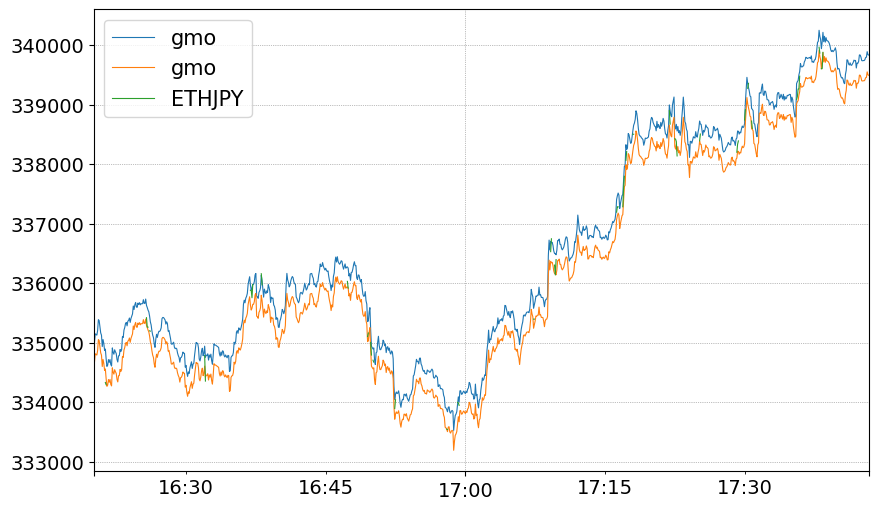

In [160]:
# pricing example
venue = "gmo"
offset = 5
ask = (dev_ma + offset).div(1e4).add(1).mul(global_mid.values)
bid = (dev_ma - offset).div(1e4).add(1).mul(global_mid.values)
pd.concat([
    ask[venue],
    bid[venue],
    tprice[venue],
], axis=1).iloc[150000:150000+1000].plot()

In [274]:
# concolidate
venue = "gmo"
offset = 4
ask = (dev_ma + offset).div(1e4).add(1).mul(global_mid.values)
bid = (dev_ma - offset).div(1e4).add(1).mul(global_mid.values)
data = pd.concat([
    ask[venue].rename("ask"),
    bid[venue].rename("bid"),
    mid[venue].rename("mid"),
    exec_price[[f"buy_{venue}", f"sell_{venue}"]].set_axis(["buy", "sell"], axis=1),
    best[venue].ETHJPY.set_axis(["best_bid", "best_ask"], axis=1),
    dev_ma[venue].to_frame("dev_ma"),
    dev_smooth[venue].to_frame("dev_smooth"),
    global_mid.mid.pct_change().rolling(freq).std().mul(np.sqrt(12 * 1440 * 365) * 100).to_frame("vol"),
    np.sign((global_mid.mid - global_mid.mid.rolling(freq).mean())).rename("ma_sign"),
], axis=1)
# data.head(3)

In [300]:
data.vol.describe().to_frame("vol").T

,count,mean,std,min,25%,50%,75%,max
vol,293758.0,47.551575,31.43675,4.964733,27.61578,39.670326,57.194589,362.275844


In [287]:
# run simulation
pos = 0
exit_spread = 4
vol_threshold = 30
horizon = 12 * 8
transactions = []
stop_loss = 15
tp_level = 30
for i, (t, row) in tqdm(enumerate(data.iterrows())):
    if pos != 0:
        # LIMIT
        if pos > 0:
            price = row.mid * (1 + exit_spread / 1e4)
            # price = transactions[-1][-2] * (1 + exit_spread / 1e4)  # Profit target pricing
            if price < row.buy:
                pos = 0
                transactions.append([i, t, -1, price, "limit"])
        elif pos < 0:
            price = row.mid * (1 - exit_spread / 1e4)
            # price = transactions[-1][-2] * (1 - exit_spread / 1e4)  # Profit target pricing
            if price > row.sell:
                pos = 0
                transactions.append([i, t, +1, price, "limit"])
        
        # SL
        if pos != 0 and pos * (row.mid / transactions[-1][-2] - 1) * 1e4 < -stop_loss:
            pos = 0
            price = row.best_bid if pos > 0 else row.best_ask
            transactions.append([i, t, pos * -1, price, "sl"])
            
        # TP
        price = row.best_bid if pos > 0 else row.best_ask
        if pos != 0 and pos * (price / transactions[-1][-2] - 1) * 1e4 > tp_level:
            pos = 0
            transactions.append([i, t, pos * -1, price, "tp"])
        
        # HORIZON
        if pos != 0 and transactions[-1][0] + horizon < i:
            pos = 0
            price = row.best_bid if pos > 0 else row.best_ask
            transactions.append([i, t, pos * -1, price, "market"])
    else:
        if row.ask < row.buy and row.vol < vol_threshold and row.dev_ma > 0 and row.ma_sign < 0:
            pos -= 1
            transactions.append([i, t, -1, row.ask, "limit"])
        if row.sell < row.bid and row.vol < vol_threshold and row.dev_ma  < 0 and row.ma_sign > 0:
            pos += 1
            transactions.append([i, t, +1, row.bid, "limit"])
            
# form results table
trs = pd.DataFrame(transactions, columns=["i", "time", "side", "price", "order"])
trs = pd.concat([
    trs.iloc[::2].reset_index(drop=True).rename(lambda x: f"entry_{x}", axis=1),
    trs.iloc[1::2].reset_index(drop=True).rename(lambda x: f"exit_{x}", axis=1),
], axis=1)

trs["pl"] = (trs.exit_price/trs.entry_price).sub(1).mul(1e4).mul(trs.entry_side)

0it [00:00, ?it/s]

In [288]:
trs.pl.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
pl,216.0,2.119664,9.962077,-26.569103,-4.035287,4.047572,7.740771,28.396937


<Axes: xlabel='entry_time'>

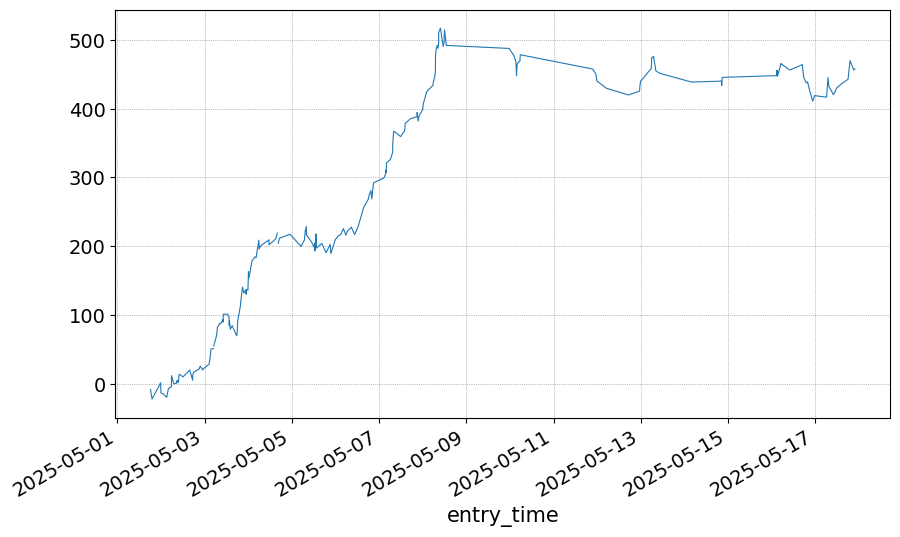

In [299]:
trs.set_index("entry_time").pl.cumsum().plot()

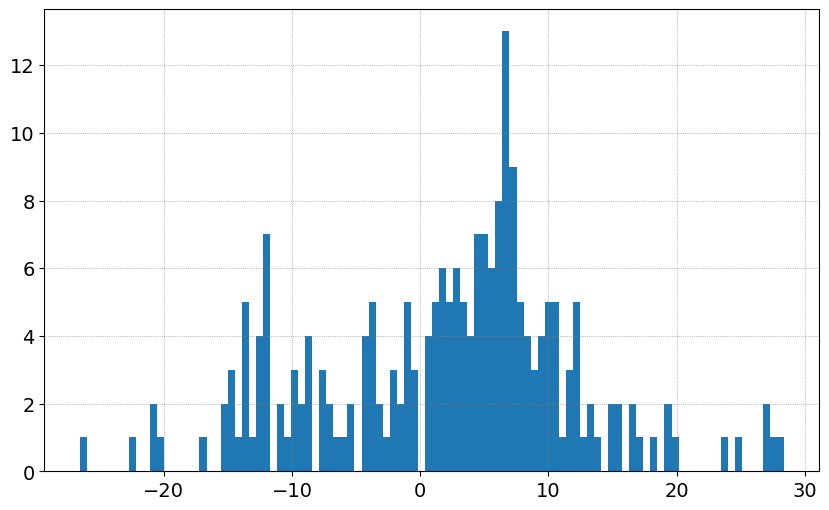

In [292]:
trs.pl.hist(bins=100);

In [293]:
trs.groupby("entry_side").pl.describe()

,count,mean,std,min,25%,50%,75%,max
entry_side,,,,,,,,
-1,18.0,-1.061146,9.487483,-22.275220,-6.022480,2.462584,6.390632,8.641748
1,198.0,2.408828,9.976713,-26.569103,-3.933329,4.261784,8.054248,28.396937


In [294]:
trs.groupby(["entry_order", "exit_order"]).pl.describe()

count       mean       std        min        25%  \
entry_order exit_order                                                     
limit       limit       137.0   5.039848  7.178938 -12.236884   1.503930   
            market       47.0   4.598595  9.287473 -12.188748  -1.788757   
            sl           32.0 -14.023308  4.266207 -26.569103 -14.949048   

                              50%        75%        max  
entry_order exit_order                                   
limit       limit        5.665795   8.641748  28.396937  
            market       4.364004   8.809267  27.635494  
            sl         -13.466573 -11.998743  -6.569524

In [295]:
trs.groupby(trs.entry_time.dt.hour).pl.describe().style.bar(subset=["mean"])

,count,mean,std,min,25%,50%,75%,max
entry_time,,,,,,,,
0,4.000000,5.521906,16.183082,-9.323062,-5.726403,2.326945,13.575254,26.756795
1,3.000000,1.303193,1.859737,-0.743063,0.509562,1.762186,2.326321,2.890457
2,7.000000,7.116442,11.406507,-10.859075,2.524262,6.713055,12.064808,24.782973
3,14.000000,1.886139,9.830640,-20.185830,-4.911468,5.802435,7.684970,15.282394
4,10.000000,1.370561,8.023298,-12.664206,-0.755273,3.676473,6.951989,9.787272
5,19.000000,3.560969,8.781726,-13.039888,0.910856,2.937832,9.167117,19.111569
6,10.000000,6.743327,4.835005,-2.242230,4.934422,5.160281,9.082355,15.563454
7,17.000000,6.242172,9.479384,-12.330145,2.088664,7.080457,10.764733,28.396937
8,12.000000,1.125348,9.957500,-20.843856,-1.497002,2.974976,6.151174,16.702354


In [296]:
trs.set_index("entry_time").between_time(datetime.time(0), datetime.time(6)).pl.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
pl,57.0,3.220741,9.446177,-20.18583,-1.212114,2.988942,8.437126,26.756795


<Axes: ylabel='PnL%'>

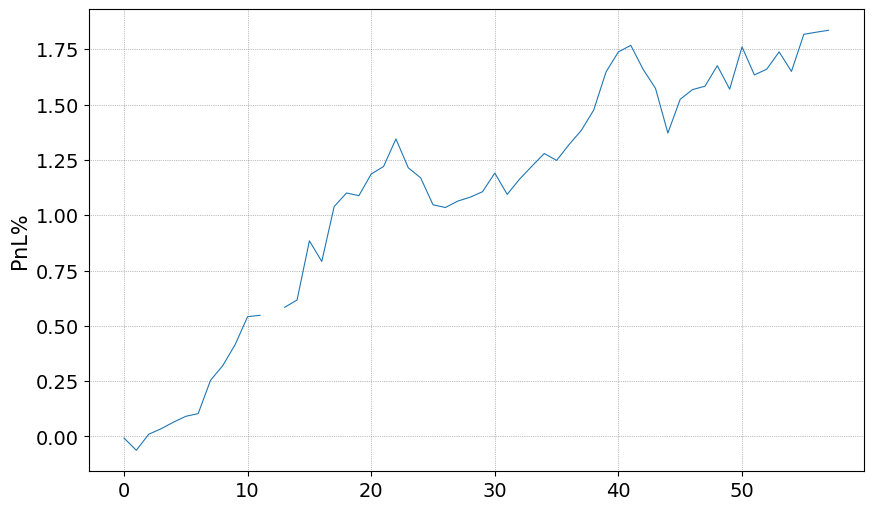

In [297]:
trs.set_index("entry_time").between_time(datetime.time(0), datetime.time(6)).pl.cumsum().div(1e2).reset_index(drop=True).plot(ylabel="PnL%")

In [298]:
trs.set_index("entry_time").between_time(datetime.time(0), datetime.time(6)).pl.resample("1d").sum().cumsum()

entry_time
2025-05-02 00:00:00+00:00     25.366595
2025-05-03 00:00:00+00:00     61.661485
2025-05-04 00:00:00+00:00    121.421789
2025-05-05 00:00:00+00:00    103.481980
2025-05-06 00:00:00+00:00    109.420479
2025-05-07 00:00:00+00:00    138.338662
2025-05-08 00:00:00+00:00    176.770616
2025-05-09 00:00:00+00:00    176.770616
2025-05-10 00:00:00+00:00    167.581387
2025-05-11 00:00:00+00:00    167.581387
2025-05-12 00:00:00+00:00    156.965643
2025-05-13 00:00:00+00:00    176.077212
2025-05-14 00:00:00+00:00    163.413006
2025-05-15 00:00:00+00:00    163.413006
2025-05-16 00:00:00+00:00    183.582261
Freq: D, Name: pl, dtype: float64